In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/superhero_toy_dataset.csv')

In [3]:
df.head() # gives overview of dataset

,Year,Title,Director(s),Lead Actor(s),Lead Actress(es),Worldwide Box Office ($ million)
0,1978,Superman,Richard Donner,Christopher Reeve,Margot Kidder,300.5
1,1980,Superman II,"Richard Lester, Richard Donner",Christopher Reeve,Margot Kidder,190.0
2,1983,Superman III,Richard Lester,Christopher Reeve,Annette O'Toole,60.0
3,1987,Superman IV: The Quest for Peace,Sidney J. Furie,Christopher Reeve,Margot Kidder,36.0
4,2002,Scooby-Doo,Raja Gosnell,"Freddie Prinze Jr., Matthew Lillard",Sarah Michelle Gellar,275.7


In [4]:
df.shape

(40, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              40 non-null     int64  
 1   Title                             40 non-null     object 
 2   Director(s)                       40 non-null     object 
 3   Lead Actor(s)                     40 non-null     object 
 4   Lead Actress(es)                  40 non-null     object 
 5   Worldwide Box Office ($ million)  40 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Year vs Earnings ($ million)')

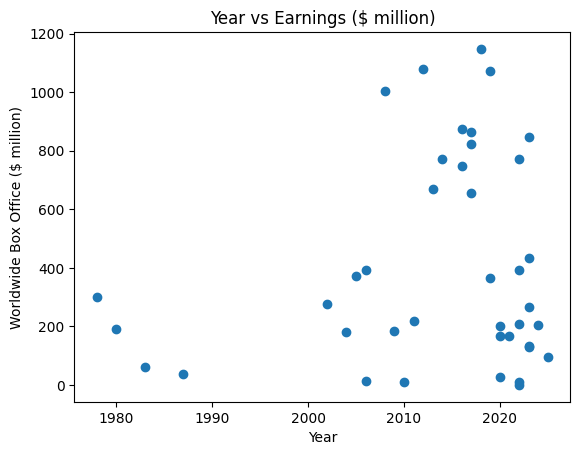

In [22]:
plt.scatter(df['Year'], df['Worldwide Box Office ($ million)'])
plt.ylabel('Worldwide Box Office ($ million)')
plt.xlabel('Year')
plt.title('Year vs Earnings ($ million)')

Text(0.5, 1.0, 'Earnings ($ million)')

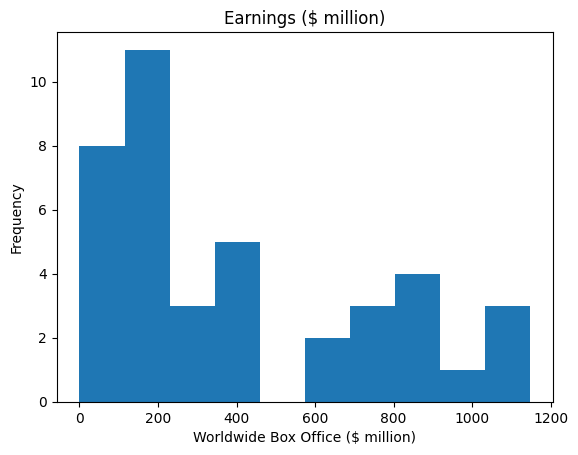

In [12]:
plt.hist(df['Worldwide Box Office ($ million)'])
plt.xlabel('Worldwide Box Office ($ million)')
plt.ylabel('Frequency')
plt.title('Earnings ($ million)')

Text(0.5, 1.0, 'Year vs Earnings ($ million)')

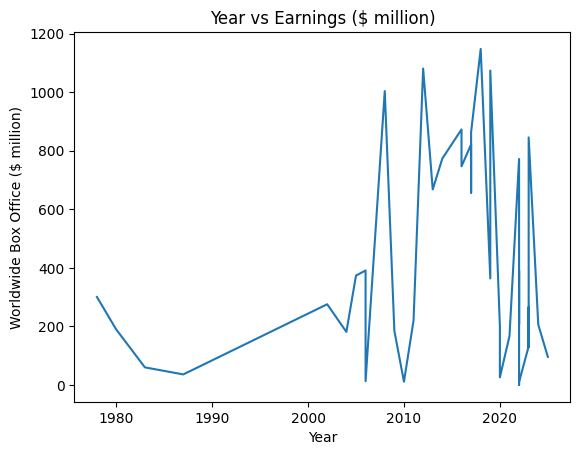

In [16]:
plt.plot(df['Year'], df['Worldwide Box Office ($ million)'])
plt.ylabel('Worldwide Box Office ($ million)')
plt.xlabel('Year')
plt.title('Year vs Earnings ($ million)')

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
le_director = LabelEncoder()
le_actor = LabelEncoder()
le_actress = LabelEncoder()

df['Director_enc'] = le_director.fit_transform(df['Director(s)'].astype(str))
df['Actor_enc'] = le_actor.fit_transform(df['Lead Actor(s)'].astype(str))
df['Actress_enc'] = le_actress.fit_transform(df['Lead Actress(es)'].astype(str))

In [27]:
print(df['Director_enc'].unique())
print(df['Actor_enc'].unique())
print(df['Actress_enc'].unique())

[17 19 18 20 16  3  1  7 24 12 13  4 15  9  5 22  2  6 14 10 11 23 21  0
 25  8]
[ 6 10  4  2 19 17 16 22 12  3  0 23 11 14 25 15 18  1 13 21  8  5  7  9
 24 20]
[17  4 22 15 12 11  9 16  8 19  6  3  2 25 10 18  1  5 24 21 26 13  0 20
 23  7 14]


In [28]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Year',
    y='Director_enc',
    z='Actor_enc',
    color='Worldwide Box Office ($ million)',
    hover_data=['Title', 'Lead Actor(s)', 'Lead Actress(es)', 'Director(s)'],
    title='Superhero Movie Visualization'
)

fig.show()

In [29]:
df.head()

,Year,Title,Director(s),Lead Actor(s),Lead Actress(es),Worldwide Box Office ($ million),Director_enc,Actor_enc,Actress_enc
0,1978,Superman,Richard Donner,Christopher Reeve,Margot Kidder,300.5,17,6,17
1,1980,Superman II,"Richard Lester, Richard Donner",Christopher Reeve,Margot Kidder,190.0,19,6,17
2,1983,Superman III,Richard Lester,Christopher Reeve,Annette O'Toole,60.0,18,6,4
3,1987,Superman IV: The Quest for Peace,Sidney J. Furie,Christopher Reeve,Margot Kidder,36.0,20,6,17
4,2002,Scooby-Doo,Raja Gosnell,"Freddie Prinze Jr., Matthew Lillard",Sarah Michelle Gellar,275.7,16,10,22


In [31]:
df.shape

(40, 9)

In [32]:
X = df[['Year', 'Director_enc', 'Actor_enc', 'Actress_enc']]
y = df['Worldwide Box Office ($ million)']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Year  Director_enc  Actor_enc  Actress_enc
39  2025             8         20           21
6   2005             3          4           12
25  2020            15         11           10
9   2008             3          4           16
13  2012             3          4            3
31  2022            23          5           21
34  2023             0          9           23
8   2006             7         19            9
17  2016             4         23           18
24  2020             2         18           18
0   1978            17          6           17
33  2023             5         25            5
5   2004            16         10           15
11  2010            12         16           19
1   1980            19          6           17
29  2022            10          8           13
21  2018             9         14            1
2   1983            18          6            4
30  2022            11          8            0
36  2023             9         14            1
3   1987     

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 4)
(8, 4)
(32,)
(8,)


In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 155.34
RMSE: 210.37
R² Score: 0.57


In [36]:
year = 2025
director = le_director.transform(['James Gunn'])[0]
actor = le_actor.transform(['David Corenswet'])[0]
actress = le_actress.transform(['Rachel Brosnahan'])[0]

X_new_df = pd.DataFrame([[year, director, actor, actress]],
                        columns=['Year', 'Director_enc', 'Actor_enc', 'Actress_enc'])

predicted_box_office = rf.predict(X_new_df)
print(f"Predicted Superman 2025 Box Office: ${predicted_box_office[0]:.2f} million")

Predicted Superman 2025 Box Office: $132.48 million
